# Solve Any Data Analysis Problem

## Chapter 8 - Project 6 - Example solution - Part 1

Road traffic data from: https://roadtraffic.dft.gov.uk/downloads

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
traffic = pd.read_csv("./data/dft_traffic_counts_raw_counts.csv.gz")
print(traffic.shape)
traffic.head()

(4815504, 35)


,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
0,749,E,2014,2014-06-25 00:00:00,7,3,Scotland,S92000003,39,East Ayrshire,...,5.0,31,15.0,4.0,4.0,4.0,13,12.0,52.0,935.0
1,749,E,2014,2014-06-25 00:00:00,8,3,Scotland,S92000003,39,East Ayrshire,...,7.0,103,29.0,3.0,2.0,7.0,18,20.0,79.0,1102.0
2,749,E,2014,2014-06-25 00:00:00,9,3,Scotland,S92000003,39,East Ayrshire,...,14.0,88,21.0,3.0,5.0,9.0,17,19.0,74.0,773.0
3,749,E,2014,2014-06-25 00:00:00,10,3,Scotland,S92000003,39,East Ayrshire,...,8.0,90,31.0,6.0,10.0,7.0,18,17.0,89.0,778.0
4,749,E,2014,2014-06-25 00:00:00,11,3,Scotland,S92000003,39,East Ayrshire,...,18.0,75,38.0,2.0,2.0,3.0,16,24.0,85.0,875.0


In [3]:
traffic.head(1).transpose()

,0
Count_point_id,749
Direction_of_travel,E
Year,2014
Count_date,2014-06-25 00:00:00
hour,7
Region_id,3
Region_name,Scotland
Region_ons_code,S92000003
Local_authority_id,39
Local_authority_name,East Ayrshire


#### Completeness?

In [4]:
traffic.isnull().sum()

Count_point_id                        0
Direction_of_travel                   0
Year                                  0
Count_date                            0
hour                                  0
Region_id                             0
Region_name                           0
Region_ons_code                       0
Local_authority_id                    0
Local_authority_name                  0
Local_authority_code                  0
Road_name                             0
Road_category                         0
Road_type                             0
Start_junction_road_name        2634972
End_junction_road_name          2634912
Easting                               0
Northing                              0
Latitude                              0
Longitude                             0
Link_length_km                  2632824
Link_length_miles               2632824
Pedal_cycles                          0
Two_wheeled_motor_vehicles            0
Cars_and_taxis                        1


We'll assume missing measurements are actually zeros

In [5]:
measurement_cols = [
    'Pedal_cycles', 'Two_wheeled_motor_vehicles',
    'Cars_and_taxis', 'Buses_and_coaches',
    'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
    'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
    'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle',
    'All_HGVs', 'All_motor_vehicles'
]

for col in measurement_cols:
    traffic[col] = traffic[col].fillna(0)

In [6]:
traffic["Region_name"].value_counts()

South East                  770532
North West                  562092
East of England             534120
South West                  478668
West Midlands               467604
Yorkshire and the Humber    413616
London                      393588
East Midlands               384516
Scotland                    298368
Wales                       286476
North East                  225924
Name: Region_name, dtype: int64

#### Granularity?

In [7]:
len(traffic[["Count_point_id", "Year", "Count_date", "hour"]].drop_duplicates())

2435120

In [8]:
len(traffic[["Count_point_id", "Year", "Count_date", "hour", "Direction_of_travel"]].drop_duplicates())

4815480

Looks like it should be one row per:

- date
- hour
- location
- direction of travel

Let's find the exceptions:

In [9]:
duplicate_groups = (
    traffic
    .groupby(["Count_point_id", "Year", "Count_date", "hour", "Direction_of_travel"])
    .size()
    .loc[lambda x: x > 1]
)

duplicate_groups

Count_point_id  Year  Count_date           hour  Direction_of_travel
7845            2014  2014-09-03 00:00:00  7     W                      2
                                           8     W                      2
                                           9     W                      2
                                           10    W                      2
                                           11    W                      2
                                           12    W                      2
                                           13    W                      2
                                           14    W                      2
                                           15    W                      2
                                           16    W                      2
                                           17    W                      2
                                           18    W                      2
77043           2003  2003-06-18 00:00:00  

In [10]:
example_dupes = (
    traffic[
        (traffic["Count_point_id"] == 7845)
        & (traffic["Count_date"] == "2014-09-03 00:00:00")
        & (traffic["hour"] == 7)
        & (traffic["Direction_of_travel"] == "W")
    ]
)

example_dupes

,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
24372,7845,W,2014,2014-09-03 00:00:00,7,10,West Midlands,E12000005,151,Solihull,...,7.0,185,30.0,5.0,5.0,6.0,2,10.0,58.0,1826.0
24384,7845,W,2014,2014-09-03 00:00:00,7,10,West Midlands,E12000005,151,Solihull,...,9.0,168,29.0,6.0,1.0,1.0,4,13.0,54.0,1354.0


Find discrepancies

In [11]:
(
    example_dupes
    .eq(example_dupes.shift(-1))
    .iloc[0]
    .loc[lambda x: x == False]
)

Two_wheeled_motor_vehicles      False
Cars_and_taxis                  False
Buses_and_coaches               False
LGVs                            False
HGVs_2_rigid_axle               False
HGVs_3_rigid_axle               False
HGVs_4_or_more_rigid_axle       False
HGVs_3_or_4_articulated_axle    False
HGVs_5_articulated_axle         False
HGVs_6_articulated_axle         False
All_HGVs                        False
All_motor_vehicles              False
Name: 24372, dtype: bool

In [12]:
(
    example_dupes[[
        'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
        'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
        'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
        'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
        'All_motor_vehicles']]
    .transpose()
)

,24372,24384
Two_wheeled_motor_vehicles,9.0,8.0
Cars_and_taxis,1567.0,1115.0
Buses_and_coaches,7.0,9.0
LGVs,185.0,168.0
HGVs_2_rigid_axle,30.0,29.0
HGVs_3_rigid_axle,5.0,6.0
HGVs_4_or_more_rigid_axle,5.0,1.0
HGVs_3_or_4_articulated_axle,6.0,1.0
HGVs_5_articulated_axle,2.0,4.0
HGVs_6_articulated_axle,10.0,13.0


So there are two rows for the same unique "identifier" with different values...

There's quite a discrepancy and we don't have a good explanation for why this might be. What are our options?

- Should these be combined? Probably not, the numbers are too similar.
- Is one of them newer data, making the other row obsolete? Possible, but which row do we drop?
- Drop these rows entirely, but this would introduce a gap into some of our time series.
- We could average the counts across the two records. This preserves the time series and keeps our numbers in the right ballpark, but we are essentially making up data.

The ideal solution is to investigate this at source, so whatever we choose here will be suboptimal. However, it's a very small subset of records so we also don't want to spend too long overthinking it.

Let's go with the averaging method.

We can do this by grouping by all non-measurement columns and calculating the mean. Rows with unique primary keys will be unaffected, and duplicates will be replaced by the means.

However, grouping with `NaN` values in `pandas` can be a problem, so it's better to replace them temporarily with placeholders that we can replace with `NaN` values again after deduplicating.

For text columns, we can use the string `"PLACEHOLDER"` and for numeric columns we can use a number not currently in the data, like -9999 (we need to verify this isn't a legitimate value first, but it shouldn't be for columns like link length in kilometres).

In [13]:
traffic.columns

Index(['Count_point_id', 'Direction_of_travel', 'Year', 'Count_date', 'hour',
       'Region_id', 'Region_name', 'Region_ons_code', 'Local_authority_id',
       'Local_authority_name', 'Local_authority_code', 'Road_name',
       'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles'],
      dtype='object')

In [14]:
print(traffic["Link_length_km"].min(),
      traffic["Link_length_miles"].min())

0.1 0.06


In [15]:
TEXT_PLACEHOLDER = "PLACEHOLDER"
NUMBER_PLACEHOLDER = -9999

group_cols = [
    'Count_point_id', 'Direction_of_travel', 'Year', 'Count_date', 'hour',
    'Region_id', 'Region_name', 'Region_ons_code', 'Local_authority_id',
    'Local_authority_name', 'Local_authority_code', 'Road_name',
    'Road_category', 'Road_type', 'Start_junction_road_name',
    'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
    'Longitude', 'Link_length_km', 'Link_length_miles'
]

traffic_deduped = (
    traffic
    .assign(
        Start_junction_road_name = lambda df_: df_["Start_junction_road_name"].fillna(TEXT_PLACEHOLDER),
        End_junction_road_name = lambda df_: df_["End_junction_road_name"].fillna(TEXT_PLACEHOLDER),
        Link_length_km = lambda df_: df_["Link_length_km"].fillna(NUMBER_PLACEHOLDER),
        Link_length_miles = lambda df_: df_["Link_length_miles"].fillna(NUMBER_PLACEHOLDER)
    )
    .groupby(group_cols)
    .mean(numeric_only=True)
    .reset_index()
    .assign(
        Start_junction_road_name = lambda df_: df_["Start_junction_road_name"].replace(TEXT_PLACEHOLDER, np.nan),
        End_junction_road_name = lambda df_: df_["End_junction_road_name"].replace(TEXT_PLACEHOLDER, np.nan),
        Link_length_km = lambda df_: df_["Link_length_km"].replace(NUMBER_PLACEHOLDER, np.nan),
        Link_length_miles = lambda df_: df_["Link_length_miles"].replace(NUMBER_PLACEHOLDER, np.nan)
    )
)

print(traffic.shape, traffic_deduped.shape)
traffic_deduped.head()

(4815504, 35) (4815480, 35)


,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
0,51,E,2020,2020-10-02 00:00:00,7,1,South West,E12000009,1,Isles of Scilly,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,51,E,2020,2020-10-02 00:00:00,8,1,South West,E12000009,1,Isles of Scilly,...,0.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,44.0
2,51,E,2020,2020-10-02 00:00:00,9,1,South West,E12000009,1,Isles of Scilly,...,0.0,17.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,36.0
3,51,E,2020,2020-10-02 00:00:00,10,1,South West,E12000009,1,Isles of Scilly,...,0.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0
4,51,E,2020,2020-10-02 00:00:00,11,1,South West,E12000009,1,Isles of Scilly,...,0.0,18.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,48.0


#### Coverage

Now let's look at coverage, first across dates

In [16]:
traffic["Count_date"] = pd.to_datetime(traffic["Count_date"], format="%Y-%m-%d %H:%M:%S")

In [17]:
traffic["Count_date"].agg(["min", "max"])

min   2000-03-17
max   2022-11-02
Name: Count_date, dtype: datetime64[ns]

Do all locations have the same coverage?

In [18]:
coverage_by_point = (
    traffic
    .groupby("Count_point_id")
    ["Count_date"]
    .agg(["min", "max"])
    .assign(coverage_years = lambda x: (x["max"] - x["min"]).dt.days / 365)
    .sort_values("coverage_years", ascending=False)
)

coverage_by_point

,min,max,coverage_years
Count_point_id,,,
36583,2000-03-24,2022-10-21,22.591781
57775,2000-03-22,2022-10-13,22.575342
60024,2000-03-21,2022-10-11,22.572603
70222,2000-03-17,2022-10-05,22.567123
38544,2000-03-17,2022-10-03,22.561644
...,...,...,...
940862,2008-10-02,2008-10-02,0.000000
940867,2009-03-20,2009-03-20,0.000000
940868,2008-04-14,2008-04-14,0.000000


Lots of variance there, let's take a look

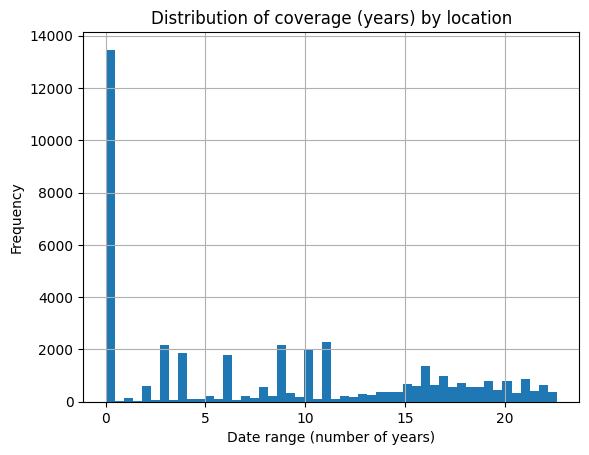

In [19]:
fig, axis = plt.subplots()

coverage_by_point["coverage_years"].hist(bins=50, ax=axis)

axis.set(
    title="Distribution of coverage (years) by location",
    xlabel="Date range (number of years)",
    ylabel="Frequency"
)

plt.show()

Lots of locations with zero. What/where are they?

In [20]:
zero_location_ids = coverage_by_point[coverage_by_point["coverage_years"] == 0].index

zero_locations = (
    traffic[traffic["Count_point_id"].isin(zero_location_ids)]
    .drop_duplicates("Count_point_id")
)

print(len(zero_locations))
zero_locations.head()

13460


,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
15618,40868,E,2014,2014-10-06,7,3,Scotland,S92000003,35,Highland,...,0.0,31,3.0,2.0,1.0,1.0,0,5.0,12.0,90.0
34704,82007,E,2014,2014-06-24,7,3,Scotland,S92000003,48,Inverclyde,...,37.0,201,16.0,1.0,2.0,0.0,2,16.0,37.0,1647.0
35554,82008,E,2014,2014-05-16,7,3,Scotland,S92000003,48,Inverclyde,...,35.0,134,18.0,1.0,2.0,5.0,1,6.0,33.0,1449.0
37318,83012,N,2014,2014-06-24,7,3,Scotland,S92000003,3,Glasgow City,...,0.0,116,16.0,3.0,2.0,2.0,2,1.0,26.0,433.0
39033,82108,E,2014,2014-09-15,7,2,East Midlands,E12000004,2,Nottinghamshire,...,5.0,145,18.0,5.0,8.0,5.0,20,16.0,72.0,759.0


In [21]:
zero_locations["Region_name"].value_counts()

South East                  1906
East of England             1724
South West                  1656
North West                  1571
Yorkshire and the Humber    1262
West Midlands               1256
East Midlands               1089
Scotland                     942
London                       829
North East                   713
Wales                        512
Name: Region_name, dtype: int64

In [22]:
zero_locations["Local_authority_name"].value_counts()

Norfolk                495
Devon                  476
Essex                  365
North Yorkshire        318
Kent                   315
                      ... 
City of London           6
Torfaen                  6
East Dunbartonshire      6
Clackmannanshire         5
Isles of Scilly          1
Name: Local_authority_name, Length: 211, dtype: int64

We should check these relative to their size

In [23]:
location_sizes = (
    traffic
    .groupby("Region_name")
    ["Count_point_id"]
    .nunique()
)

location_sizes

Region_name
East Midlands               3405
East of England             4666
London                      3329
North East                  2022
North West                  5063
Scotland                    3376
South East                  6097
South West                  4451
Wales                       2338
West Midlands               4132
Yorkshire and the Humber    3642
Name: Count_point_id, dtype: int64

In [24]:
(
    location_sizes
    .reset_index()
    .merge(
        zero_locations["Region_name"]
            .value_counts()
            .reset_index(name="count")
            .rename(columns={"index": "Region_name"}),
        on="Region_name"
    )
    .rename(columns={
        "Count_point_id": "total_points",
        "count": "number_of_zeros"
    })
    .assign(pct_zeros = lambda x: x["number_of_zeros"] / x["total_points"])
)

,Region_name,total_points,number_of_zeros,pct_zeros
0,East Midlands,3405,1089,0.319824
1,East of England,4666,1724,0.369481
2,London,3329,829,0.249024
3,North East,2022,713,0.352621
4,North West,5063,1571,0.310290
5,Scotland,3376,942,0.279028
6,South East,6097,1906,0.312613
7,South West,4451,1656,0.372051
8,Wales,2338,512,0.218991
9,West Midlands,4132,1256,0.303969


So that's 25-30% of locations with only one one count instance in all regions, which roughly equal (but noticably fewer in London, Scotland, Wales).

What about by LA?

In [25]:
la_sizes = (
    traffic
    .groupby("Local_authority_name")
    ["Count_point_id"]
    .nunique()
)

la_sizes

Local_authority_name
Aberdeen City            84
Aberdeenshire           223
Angus                    86
Argyll & Bute           112
Barking and Dagenham     48
                       ... 
Wokingham               109
Wolverhampton           172
Worcestershire          537
Wrexham                 100
York                    110
Name: Count_point_id, Length: 211, dtype: int64

In [26]:
(
    la_sizes
    .reset_index()
    .merge(
        zero_locations["Local_authority_name"]
            .value_counts()
            .reset_index(name="count")
            .rename(columns={"index": "Local_authority_name"}),
        on="Local_authority_name"
    )
    .rename(columns={"Count_point_id": "total_points", "count": "number_of_zeros"})
    .assign(pct_zeros = lambda x: x["number_of_zeros"] / x["total_points"])
    .sort_values("pct_zeros")
)

,Local_authority_name,total_points,number_of_zeros,pct_zeros
199,West Northamptonshire,83,6,0.072289
168,Southwark,119,13,0.109244
91,Islington,86,10,0.116279
125,North Northamptonshire,75,9,0.120000
30,Camden,97,12,0.123711
...,...,...,...,...
106,Luton,97,41,0.422680
44,Cumbria,585,252,0.430769
128,North Yorkshire,726,318,0.438017
120,Norfolk,1001,495,0.494505


Much more variation across Local Authorities - Devon and Norfolk have the biggest percentage of single-instance location points, Devon over half!

Perhaps they're new locations for counting, or were a one-off. Either way, there is less data overall in some of these areas.

What this tells us about coverage is that there is uneven coverage of road traffic counting around the country.

### Gaps

We've established that different locations have tracked data since a different starting point. To identify gaps, we can't just count the number of unique dates, we need to calculate the difference between the previous date and flag any cases with over a 1 day gap.

Anything with gaps is going to be a problem for time series analysis and forecasting.

In [27]:
points_and_dates = (
    traffic
    .groupby(["Count_point_id", "Count_date"])
    .size()
    .reset_index()
    .sort_values(["Count_point_id", "Count_date"])
)

points_and_dates.head()

,Count_point_id,Count_date,0
0,51,2004-05-21,24
1,51,2012-10-17,24
2,51,2020-10-02,24
3,52,2002-09-24,24
4,52,2011-10-04,24


This is where we realise that we hadn't read the data documentation closely and we actually have hourly data for **one day per year**!

Time to revisit that idea of coverage and see whether there are any counting points that have annual data over a long period.

Let's look at count points that have the highest number of unique years (not the highest difference between first date and last date) and (arbitrarily) at least 10 years' worth of data.

In [28]:
num_years_by_point = (
    traffic
    .groupby("Count_point_id")
    ["Year"]
    .nunique()
    .loc[lambda x: x > 10]
    .sort_values(ascending=False)
)

num_years_by_point

Count_point_id
26010     23
46010     23
46008     23
16008     23
56047     23
          ..
943254    11
943258    11
943260    11
943262    11
942247    11
Name: Year, Length: 4959, dtype: int64

Let's look at data for some of those most-established count points.

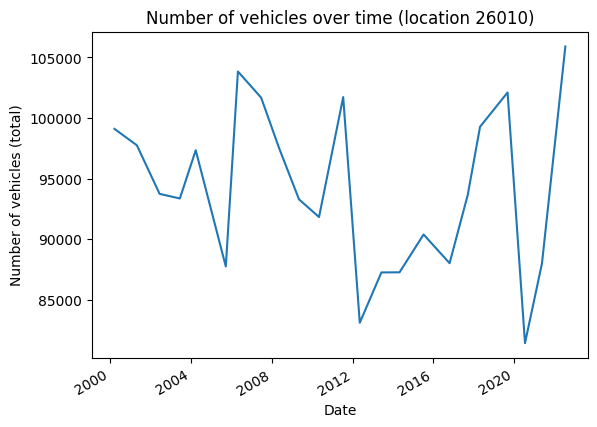

In [29]:
fig, axis = plt.subplots()

LOCATION_ID = "26010"

(
    traffic
    .query(f"Count_point_id == {LOCATION_ID}")
    .groupby("Count_date")
    ["All_motor_vehicles"]
    .sum()
    .plot(ax=axis)
)

axis.set(
    title=f"Number of vehicles over time (location {LOCATION_ID})",
    xlabel="Date",
    ylabel="Number of vehicles (total)"
)

plt.show()

We have a time series!

Now let's identify whether any of those count points with over 10 years of data have any gaps.

In [30]:
num_years_by_point

Count_point_id
26010     23
46010     23
46008     23
16008     23
56047     23
          ..
943254    11
943258    11
943260    11
943262    11
942247    11
Name: Year, Length: 4959, dtype: int64

In [31]:
long_count_points = num_years_by_point.index

gaps = (
    traffic
    .query("Count_point_id in @long_count_points")
    [["Count_point_id", "Year"]]
    .drop_duplicates()
    .sort_values(["Count_point_id", "Year"])
    .assign(
        prev_year= lambda x: x["Year"].shift(),
        diff= lambda x: x["Year"] - x["prev_year"]
    )
)

gaps.head(20)

,Count_point_id,Year,prev_year,diff
2702896,501,2000,NaN,NaN
2526432,501,2001,2000.0,1.0
2320148,501,2002,2001.0,1.0
2642988,501,2004,2002.0,2.0
1444969,501,2006,2004.0,2.0
528811,501,2009,2006.0,3.0
3353634,501,2010,2009.0,1.0
3028085,501,2011,2010.0,1.0
2669418,501,2012,2011.0,1.0
2977261,501,2013,2012.0,1.0


We also have to be careful not to calculate the difference between the **last** year encountered for a certain ID and the **first** ID encountered for the next one. To that end, we also check whether the previous ID is still the same as the current one before deciding to mark a row as having a gap.

In [32]:
gaps = (
    gaps
    .assign(
        prev_id= lambda x: x["Count_point_id"].shift()
    )
    .query("diff > 1 and Count_point_id == prev_id")
)

gaps.head()

,Count_point_id,Year,prev_year,diff,prev_id
2642988,501,2004,2002.0,2.0,501.0
1444969,501,2006,2004.0,2.0,501.0
528811,501,2009,2006.0,3.0,501.0
4054701,501,2019,2017.0,2.0,501.0
4791625,501,2022,2020.0,2.0,501.0


This is now all instances where the previous year in the data was more than 1 year ago (i.e. there's a gap).

Now we can remove these IDs from the list and see what we're left with.

In [33]:
gap_ids = gaps["Count_point_id"].unique()

all_time_series_raw = (
    traffic
    .query("Count_point_id in @long_count_points \
    and Count_point_id not in @gap_ids")
)

all_time_series_raw.head()

,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
2488,931855,E,2016,2016-06-06,7,3,Scotland,S92000003,206,East Renfrewshire,...,4.0,33,1.0,0.0,0.0,0.0,0,0.0,1.0,233.0
2489,931855,E,2016,2016-06-06,8,3,Scotland,S92000003,206,East Renfrewshire,...,12.0,30,0.0,3.0,3.0,0.0,1,0.0,7.0,437.0
2490,931855,E,2016,2016-06-06,9,3,Scotland,S92000003,206,East Renfrewshire,...,4.0,21,0.0,1.0,3.0,0.0,0,1.0,5.0,250.0
2491,931855,E,2016,2016-06-06,10,3,Scotland,S92000003,206,East Renfrewshire,...,2.0,36,2.0,0.0,0.0,0.0,0,0.0,2.0,261.0
2492,931855,E,2016,2016-06-06,11,3,Scotland,S92000003,206,East Renfrewshire,...,2.0,43,1.0,2.0,1.0,0.0,0,0.0,4.0,282.0


Now let's aggregate the filtered raw data to annual counts

In [34]:
all_time_series = (
    all_time_series_raw
    .groupby(["Count_point_id", "Count_date"])
    ["All_motor_vehicles"]
    .sum()
    .reset_index()
)

print(all_time_series["Count_point_id"].nunique())

all_time_series.head()

1419


,Count_point_id,Count_date,All_motor_vehicles
0,6003,2000-03-31,87479.0
1,6003,2001-06-25,74103.0
2,6003,2002-05-21,72377.0
3,6003,2003-06-05,91505.0
4,6003,2004-06-16,90564.0


So we still have over 1400 count points with over 10 years of gapless data.

But what data do we actually have?

Page 5 of the metadata document (https://storage.googleapis.com/dft-statistics/road-traffic/all-traffic-data-metadata.pdf) says _A raw count represents the number of vehicles of each type that flowed past a given point on that
day broken by direction and hour_, so we have time series showing the total number of vehicles that passed a count point **in a single day** on a particular date.

We could use it as a proxy for "traffic over time".

Caveats:

- measurements aren't on the same day, perhaps we start by looking at points that are measured around the same time each year
- whatever part of the year the measurements are on will have a bias, so we need to make sure we compare apples to apples
- single days can skew our data for a whole host of reasons, so results will be very tentative

The measurements are taken on one day each year, so let's see what days of the week that's spread across.

In [35]:
(
    all_time_series_raw[["Count_date"]]
    .drop_duplicates()
    ["Count_date"]
    .dt.weekday
    .value_counts(normalize=True)
    .sort_index()
)

0    0.186194
1    0.203293
2    0.205193
3    0.200127
4    0.205193
Name: Count_date, dtype: float64

So an even spread between all weekdays - fewer Mondays, but never weekends. Useful to know!

Now let's identify locations where measurements are at least taken **in the same month every year**.

In [36]:
same_month_time_series = (
    all_time_series
    .assign(month=lambda x: x["Count_date"].dt.month)
    .groupby("Count_point_id")
    ["month"]
    .nunique()
    .loc[lambda x: x == 1]
)

print(len(same_month_time_series))

same_month_time_series.head()

691


Count_point_id
900056    1
919150    1
930188    1
931832    1
931837    1
Name: month, dtype: int64

There are definitely cases where all measurements were in the same month:

In [37]:
all_time_series[all_time_series["Count_point_id"] == 900056]

,Count_point_id,Count_date,All_motor_vehicles
324,900056,2007-05-14,10097.0
325,900056,2008-05-12,10278.0
326,900056,2009-05-11,10367.0
327,900056,2010-05-10,8705.0
328,900056,2011-05-16,7769.0
329,900056,2012-05-14,8435.0
330,900056,2013-05-13,8107.0
331,900056,2014-05-12,8798.0
332,900056,2015-05-11,8896.0
333,900056,2016-05-09,7508.0


We could look for cases where the date was the same, but that date would be different days of the week so it wouldn't actually help make our results more comparable.

Still, we have almost 700 time series where the counts are measured in the same month each year.

Let's look at a sample of these.

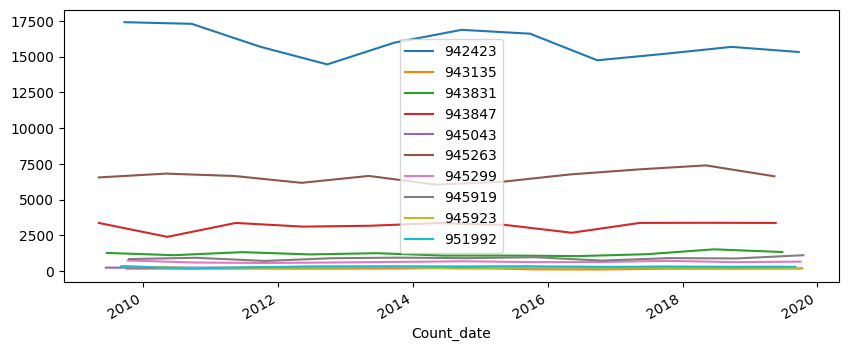

In [38]:
same_month_ids = same_month_time_series.index

same_month_ids_selection = pd.Series(same_month_time_series.index).sample(10, random_state=42)

fig, axis = plt.subplots(figsize=(10, 4))

time_series_sample = (
    all_time_series
    .query("Count_point_id in @same_month_ids_selection")
)

for count_point_id in time_series_sample["Count_point_id"].unique():
    point_series = time_series_sample[time_series_sample["Count_point_id"] == count_point_id]
    point_series.set_index("Count_date")["All_motor_vehicles"].plot(ax=axis, label=count_point_id)

axis.legend()

plt.show()

This isn't very informative, but it does show that we do, in fact, have time series over multiple years, with no gaps.

Let's export this intermediate data (to parquet, to keep type information) and explore it in another notebook.

Although we've already aggregated the data to daily series, we definitely want to have access to the raw data, so we'll use our final list of filtered time series to keep only the series 

***Note: this exports the file to the chapter 9 folder, so Part 2 of the solution code can pick up the latest version***

In [39]:
ids_to_export = same_month_time_series.index

(
    traffic
    .query("Count_point_id in @ids_to_export")
    .to_parquet("../chapter-9/data/time_series.parquet.gz", compression="gzip")
)